In [1]:
%load_ext autoreload
%matplotlib inline
from IPython.display import display

In [2]:
# python -m pip install 'git+https://github.com/MaureenZOU/detectron2-xyz.git'

import numpy as np

from PIL import Image
import matplotlib.pyplot as plt

import sys
sys.path.append(".")
sys.path.append("../../")
import os

from utils.logging import CustomLogger
from utils import logging
from agents import agent_factory

from executor import SimpleExecutor, LineWiseExecutor

from utils.image_utils import visualize_image, resize_image


/home/kaixin/anaconda3/envs/dom/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
logger = CustomLogger()
logging.set_logger(logger)

Specify Your task here.

In [4]:
# prompt="""Task: Put the red block into the green bowl."""
prompt="""Task: Put the GPU on the floor."""

In [5]:
image = Image.open("/home/kaixin/Desktop/LargePlanner/tests/assets/images/table_top.png")
agent = agent_factory("DetVLM")

Input image:


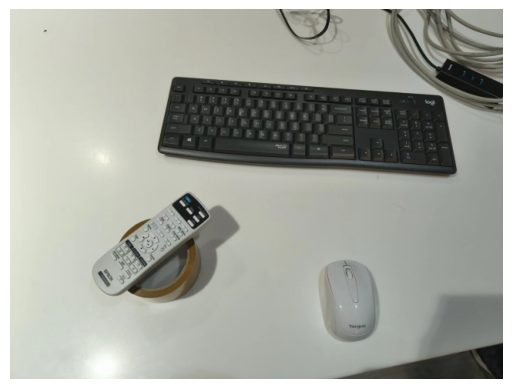

PlanResult(success=False,
 exception=EmptyCodeError('No python code block was found.'),
plan_raw=None,
 masks=<No masks>,
 prompt=None,
 plan_code=None,
 annotated_image=None,
 info_dict={'logs': [{'name': 'Configs', 'type': 'info', 'message': "{'label_mode': '1', 'alpha': 0.75}", 'image': None, 'content': None}, {'name': 'Detect objects', 'type': 'call', 'message': "Queries: ['refrigerator', 'oven', 'microwave', 'toaster', 'blender', 'coffee maker', 'dishwasher', 'pot', 'pan', 'cutting board', 'knife', 'spoon', 'fork', 'plate', 'bowl', 'cup', 'coaster', 'glass', 'kettle', 'paper towel holder', 'trash can', 'food storage container', 'sofa', 'coffee table', 'television', 'bookshelf', 'armchair', 'floor lamp', 'rug', 'picture frame', 'curtain', 'blanket', 'vase', 'indoor plant', 'remote control', 'candle', 'wall art', 'clock', 'magazine rack', 'phone', 'pen', 'marker', 'laptop', 'tape', 'keyboard', 'block']", 'image': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=640x480 at 0x7F1

ValueError: not enough values to unpack (expected 2, got 0)

In [6]:
print("Input image:")
visualize_image(image)
plan_result = agent.try_plan(prompt, image)
print(plan_result)

if plan_result.success:
    print("Annotated image: ")
    visualize_image(plan_result.annotated_image)
    # Build a context containing the masks for the plan code to access
    masks = {"regions": [mask["segmentation"] for mask in plan_result.masks]}

# Fake execution for inspection
# global inspect_logger
# context, inspect_logger = env.get_inspect_execution_context(plan_image=image)
# inspect_executor = SimpleExecutor(context)
# inspect_executor.execute_plan(plan_result.plan_code, additional_context=masks)



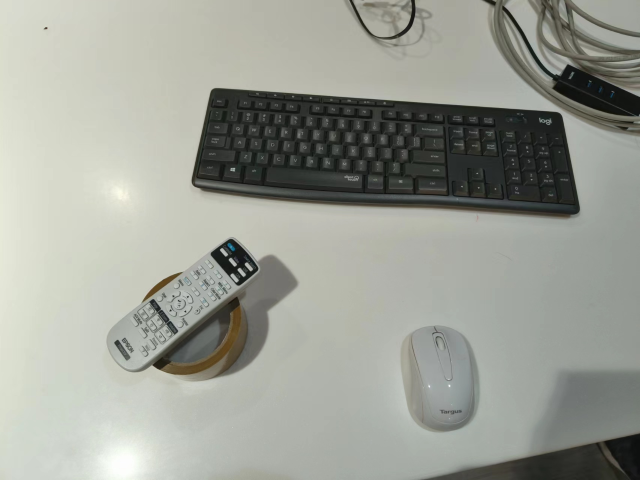
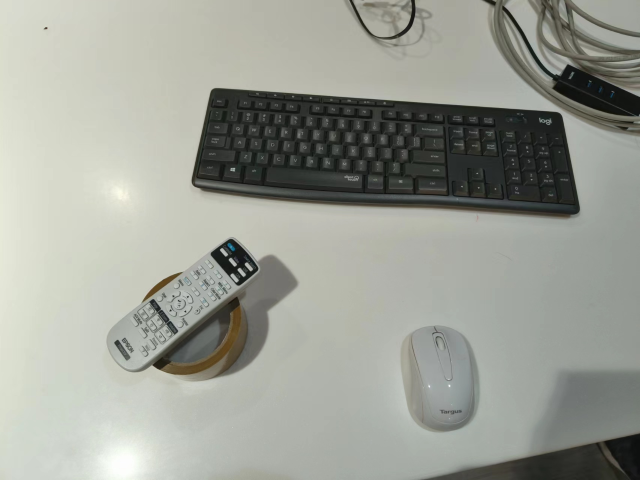
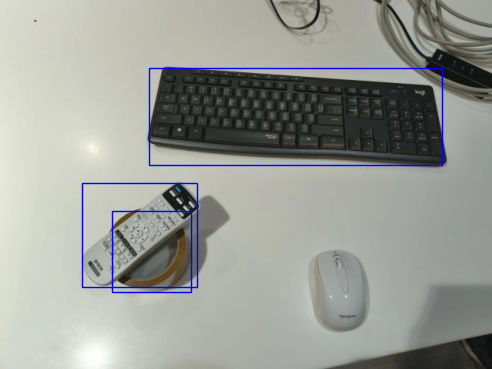
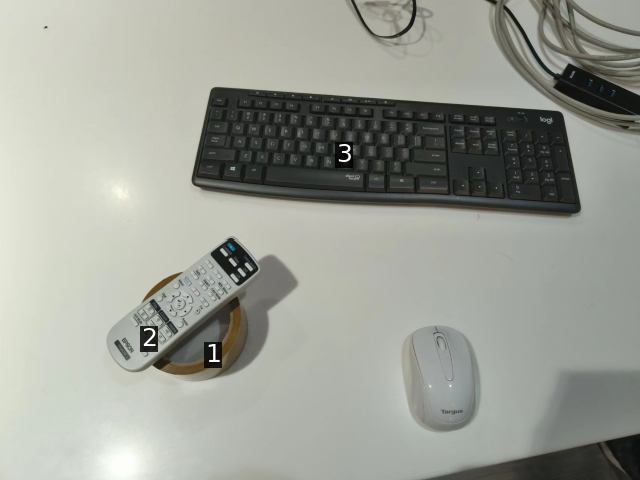
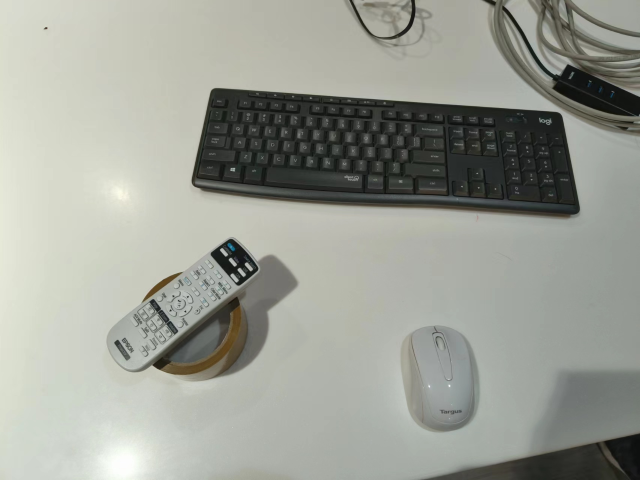

In [ ]:
logging.get_logger().display_html_logs_in_notebook()

In [ ]:
logger.save_logs_to_html_file("result.html")